In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load your data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [8]:
# Check for duplicated values

duplicates = train_data.duplicated()

# Count the number of duplicated rows
num_duplicates = duplicates.sum()

print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


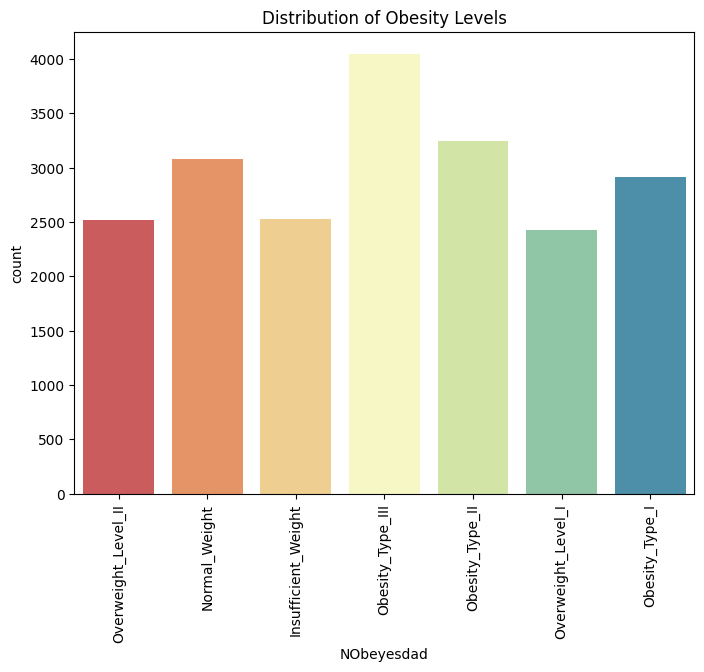

In [9]:
# Visualize the distribution of the target variable (NObeyesdad)

plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', data=train_data,palette='Spectral')
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

In [10]:
train_data['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [11]:
#Encode the target variable
# train_data.replace({'NObeyesdad':
#                     {'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,
#                      'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,
#                      'Obesity_Type_III':6}},inplace=True)

In [12]:
train_data['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [13]:
# # Encode target variable into numerical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['NObeyesdad'] = label_encoder.fit_transform(train_data['NObeyesdad'])

In [14]:
train_data['NObeyesdad'].unique()

array([6, 1, 0, 4, 3, 5, 2])

In [15]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,6
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,1
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,0
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,4
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,6


##### Feature Engineering

In [16]:
#Preprocessing categorical to Numerical

train_data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
train_data.replace({'family_history_with_overweight':{'yes':1,'no':0}},inplace=True)
train_data.replace({'SMOKE':{'yes':1,'no':0}},inplace=True)
train_data.replace({'FAVC':{'yes':1,'no':0}},inplace=True)
train_data.replace({'CAEC':{'no':0,'Frequently':1,'Sometimes':2,'Always':3}},inplace=True)
train_data.replace({'SCC':{'yes':1,'no':0}},inplace=True)
train_data.replace({'CALC':{'no':0,'Frequently':1,'Sometimes':2}},inplace=True)
train_data.replace({'MTRANS':{'Public_Transportation':0,'Automobile':1,'Walking':2,'Motorbike':3,'Bike':4}},inplace=True)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [18]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,2,0,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,0,1,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,0,0,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,2,0,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,2,0,6


In [19]:
# Define numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns


In [20]:
# Preprocessing for numerical data (imputation and scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing for categorical data (imputation and encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [21]:
# Apply polynomial features if needed
poly_transformer = PolynomialFeatures(degree=2)

# Add polynomial features to the pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly_transformer)
])

In [22]:
# Split features and target variable

X = train_data.drop(columns=['NObeyesdad'],axis=1)
y = train_data['NObeyesdad']

In [23]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [25]:
# Create Logistic Regression and SVM pipelines
logistic_model = Pipeline(steps=[
    ('preprocessing', preprocessing_pipeline),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [26]:
svm_model = Pipeline(steps=[
    ('preprocessing', preprocessing_pipeline),
    ('classifier', SVC())
])

In [27]:
model_svm_train = svm_model.fit(X_train,y_train)
model_logistic_train = logistic_model.fit(X_train,y_train)

In [28]:
svm_pred = model_svm_train.predict(X_test)
logistic_pred = model_logistic_train.predict(X_test)

In [29]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

print("Logistic Regression Report:\n", classification_report(y_test, logistic_pred))
print("SVM Report:\n", classification_report(y_test, svm_pred))


Logistic Regression Accuracy: 0.8706647398843931
SVM Accuracy: 0.8289980732177264
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       524
           1       0.85      0.84      0.84       626
           2       0.85      0.84      0.85       543
           3       0.96      0.97      0.96       657
           4       1.00      0.99      1.00       804
           5       0.71      0.71      0.71       484
           6       0.71      0.73      0.72       514

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152

SVM Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       524
           1       0.73      0.78      0.75       626
           2       0.82      0.79      0.81       543
           3       0.96      0.96      0.96       657
        

- Best Model found withhout Hyperparameter and ensemble techiniques is Logistic Regression with 87% accuracy

### Sample test for Prediction


### Prediction System

In [30]:

#sample Data
input_data = (10317,0,26.000000,1.649178,111.933010,1,1,3.000000,3.000000,2,0,1.292479,0,0.065264,0.711331,2,0)  # Replace with actual input data
input_data_arr = np.asarray(input_data).reshape(1, -1)

input_data_df = pd.DataFrame(input_data_arr, columns=train_data.columns.drop('NObeyesdad'))  # Replace 'target' with the actual target column name

pred = model_logistic_train.predict(input_data_df)
print(f'The prediction is {pred}')


if pred[0] == 0:
    print('The person is Normal_Weight')
elif pred[0] == 1:
    print('The person is Insufficient_Weight')
elif pred[0] == 2:
    print('The person is Obesity_Type_I')
elif pred[0] == 3:
    print('The person is Obesity_Type_II')
elif pred[0] == 4:
    print('The person is Obesity_Type_III')
elif pred[0] == 5:
    print('The person is Overweight_Level_I')
else:
    print('The person is Overweight_Level_II')

The prediction is [4]
The person is Obesity_Type_III


### Hyperparameters

In [35]:
# Set up hyperparameter grids
logistic_param_grid = {'classifier__C': [0.1, 1, 10]}
svm_param_grid = {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}


In [36]:
# Perform hyperparameter tuning
logistic_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5)
svm_search = GridSearchCV(svm_model, svm_param_grid, cv=5)


In [37]:
# Fit models
logistic_search.fit(X_train, y_train)
svm_search.fit(X_train, y_train)


In [ ]:
# Evaluate models
logistic_pred = logistic_search.predict(X_test)
svm_pred = svm_search.predict(X_test)


In [26]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

print("Logistic Regression Report:\n", classification_report(y_test, logistic_pred))
print("SVM Report:\n", classification_report(y_test, svm_pred))


KeyboardInterrupt: 

In [35]:
#Regularizationn

# L2 Regularization (Ridge)
logistic_model_l2 = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# L1 Regularization (Lasso)
logistic_model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)

# Fit and evaluate L1/L2 models similarly as shown before

logistic_model_l1.fit(X_train,y_train)
logistic_model_l2.fit(X_train,y_train)

l1_pred= logistic_model_l1.predict(X_test)
l2_pred = logistic_model_l2.predict(X_test)
accuracy_score(y_test,l2_pred) 
accuracy_score(y_test,l1_pred)

#75% accuracy

0.7545761078998073

In [36]:
#ensemble

from sklearn.ensemble import VotingClassifier

# Create a voting ensemble of Logistic Regression and SVM
ensemble_model = VotingClassifier(estimators=[
    ('logistic', logistic_search.best_estimator_),
    ('svm', svm_search.best_estimator_)
], voting='hard')

# Train the ensemble
ensemble_model.fit(X_train, y_train)

# Predict and evaluate the ensemble
ensemble_pred = ensemble_model.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred))
print("Ensemble Report:\n", classification_report(y_test, ensemble_pred))


NameError: name 'logistic_search' is not defined

In [ ]:
# Make predictions on test data
test_pred = logistic_search.best_estimator_.predict(test_data)

# Prepare the submission file
submission = pd.read_csv('sample_submission.csv')
submission['target'] = test_pred  # Replace 'target' with the name of the target column

# Save submission file
submission.to_csv('submission.csv', index=False)
